In [270]:
TRANING_DATA_FILE_PATH = '../data/serial_moniter_data_20211030_2_e2.txt'
TOTAL_TRAINING_TIME = 38.0

In [271]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [272]:
def extract_texts(input_path, re_keyword):
    """
    テキストファイルの中から、正規表現で与えられたキーワードに合致する部分を全て抽出し、リストに格納して返す

    Params
    ----
    input_path: テキストファイルのファイルパス
    re_keyword: 合致するか調べるキーワード(正規表現)

    Return
    -----
    list_of_texts_matching_re_keyword: re_keywordに合致する部分を全て抽出して格納したリスト
    """

    #　ファイルからテキストを読み込む
    with open(input_path, "r") as f:
        input_text = f.read()

    # 正規表現で与えられたキーワードに合致するテキストを抽出し格納したリスト
    list_of_texts_matching_re_keyword = re.findall(re_keyword, input_text)

    return list_of_texts_matching_re_keyword


def extract_nums_after_keyword(input_path, re_keyword):
    """
    テキストファイルの中から、正規表現で与えられたキーワードの直後に並ぶ数値を取り出し、リストに格納する

    Params
    ----
    input_path: テキストファイルのファイルパス
    re_keyword: 合致するか調べるキーワード(正規表現)

    Return
    -----
    nums_after_keyword: re_keywordの直後に並ぶ数値を取り出して格納したリスト
    """

    #　ファイルからテキストを読み込む
    with open(input_path, "r") as f:
        input_text = f.read()

    re_keyword_with_nums = re_keyword + "[+-]?\d+(?:\.\d+)?" # 数値込みの検索キーワードを生成
    list_of_texts_matching_re_keyword_with_nums = re.findall(re_keyword_with_nums, input_text) # 数値込みの検索キーワードに合致する部分を抽出してリストに格納
    text_matching_re_keyword_with_nums = ''.join(list_of_texts_matching_re_keyword_with_nums) # 数値込みの検索キーワードに合致する部分を、一つのテキストに結合する

    nums_after_keyword_str = re.findall("[+-]?\d+(?:\.\d+)?", text_matching_re_keyword_with_nums) # 数値のみ抽出し格納したリスト
    nums_after_keyword = list(map(float, nums_after_keyword_str)) # 数値のみ抽出し格納したリストを数値に変換

    return nums_after_keyword


def plot_graph(data, time):
    """
    グラフを描画

    Params
    ------
    data: 描画する数字を格納したリスト
    time: データを取得していた合計時間
    """
    y = np.array(data)
    num_of_data = len(y) # データ数
    dt = time / num_of_data # 各データ間の(平均)時間変化 
    x = np.array([i * dt for i in range(0, num_of_data)]) # x軸に表示する秒数

    #描画
    plt.figure(figsize=(15,10))
    plt.plot(x, y)

In [273]:
"""
トルク、スピード、位置、時間のデータを、それぞれ配列の形で作成
"""

position_recieved_data =  -np.array(extract_nums_after_keyword(TRANING_DATA_FILE_PATH, '\"position_recieved\":')) # 位置データ。バーの上下と符号を合わせるために、符号反転

num_of_data = len(position_recieved_data) # データ数

# トルクとスピードのデータ数は、位置のデータ数に合わせる
torque_recieved_data = np.array(extract_nums_after_keyword(TRANING_DATA_FILE_PATH, '{\"torque_recieved\":'))[:num_of_data] # トルクデータ
speed_recieved_data = np.array(extract_nums_after_keyword(TRANING_DATA_FILE_PATH, '\"speed_recieved\":'))[:num_of_data] # スピードデータ

#　時間データを作成
dt = TOTAL_TRAINING_TIME / num_of_data # 各データ間の(平均)時間変化 
time_data = np.array([i * dt for i in range(0, num_of_data)]) # 時間を刻んだデータ

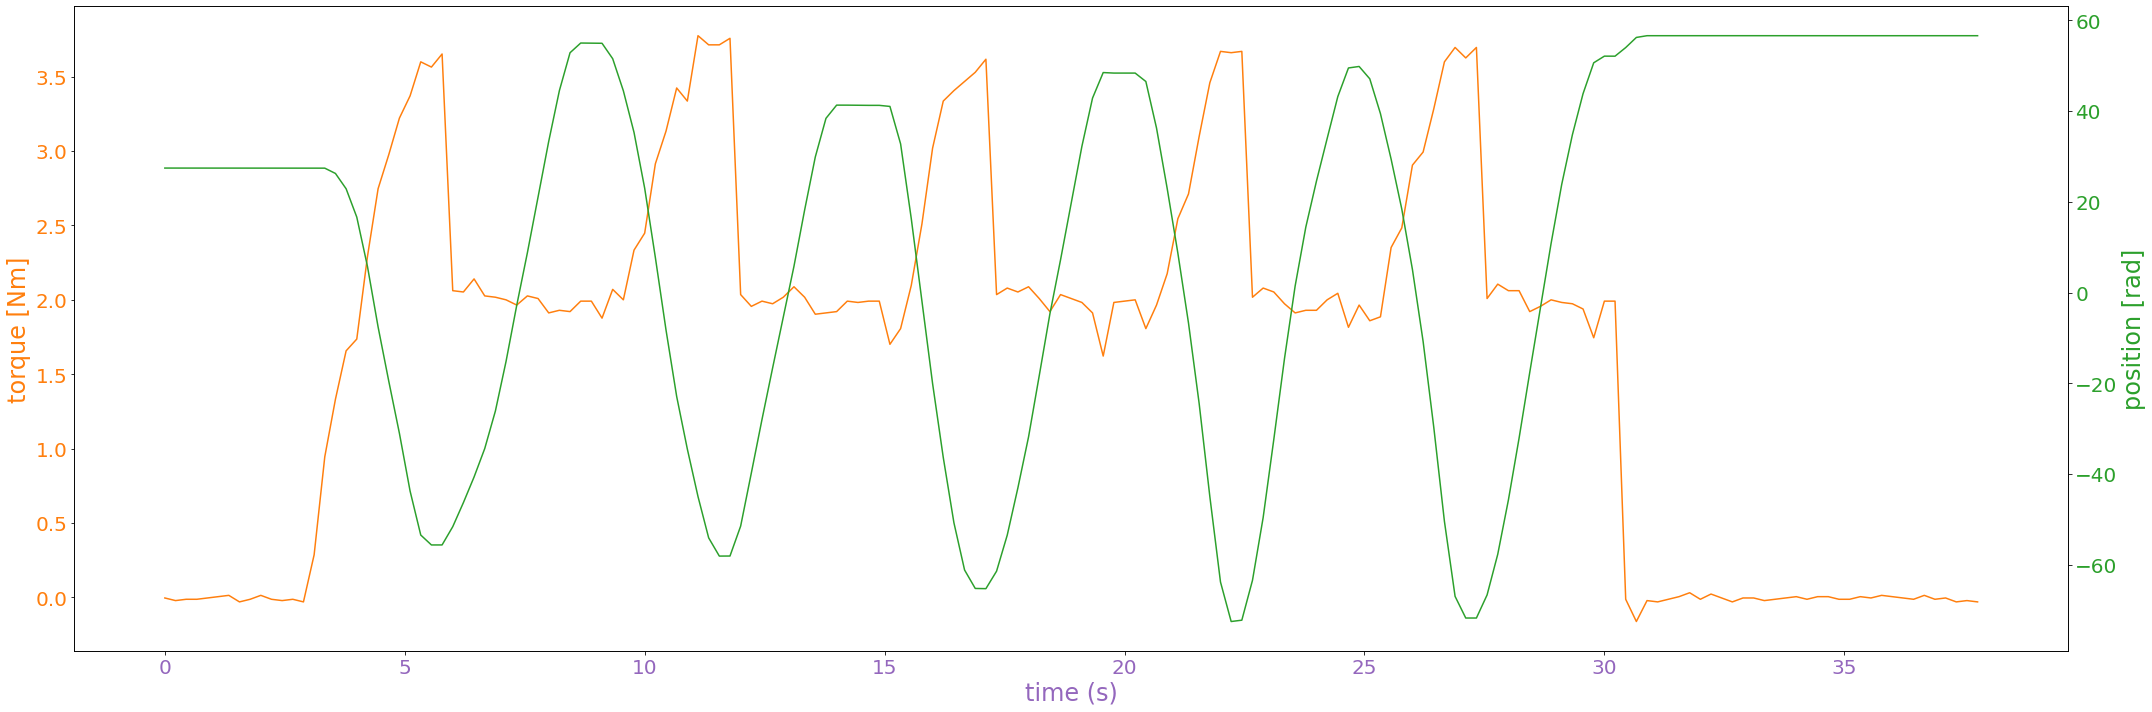

In [274]:
"""
トルクと位置のデータを描画
"""

fig, ax1 = plt.subplots(figsize=(30, 10))

# トルクデータを描画
color = 'tab:orange'
ax1.set_ylabel('torque [Nm]', color=color, fontsize=24)
ax1.plot(time_data, torque_recieved_data, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

# 位置データを描画
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('position [rad]', color=color, fontsize=24) 
ax2.plot(time_data, position_recieved_data, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

# 時間データを描画
color = 'tab:purple'
ax1.set_xlabel('time (s)',color=color, fontsize=24)
ax1.tick_params(axis='x', labelcolor=color, labelsize=20)

fig.tight_layout()
plt.show()

In [ ]:
# 力積


In [ ]:
# 出力(パワー)